In [4]:
# importing the dataset
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
# checking the description of the dataset
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
#exploring/checking the values stored in target
import pandas as pd
x,y=mnist["data"],mnist["target"]


pandas.core.frame.DataFrame

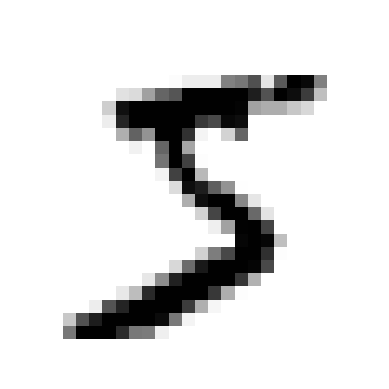

In [ ]:
#exploring values in data and checking the image stored in data
digit=x.iloc[0].to_numpy()
import matplotlib as mpl
import matplotlib.pyplot as plt
digit_img=digit.reshape(28,28)
plt.imshow(digit_img,cmap="binary")
plt.axis("off")
plt.show()



In [32]:
#converting Y to numerical values
import numpy as np
y=y.astype(np.uint8)
# y=pd.DataFrame(y)

In [38]:
#defining training and testing set
x_train=x[:60000]
x_test=x[60000:]
y_train=y[:60000]
y_test=y[60000:]
print(y_train)

       class
0          5
1          0
2          4
3          1
4          9
...      ...
59995      8
59996      3
59997      5
59998      6
59999      8

[60000 rows x 1 columns]


In [ ]:
#making labels for the classifier by changing the labels to either True or False for instances of 5
y_train_mod=(y_train==5)
print(y_train_mod.head())


   class
0   True
1  False
2  False
3  False
4  False
   class
0      5
1      0
2      4
3      1
4      9


In [42]:
#using an Stochastic gradient descent model
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_mod)

c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [ ]:
#checking the predictions from the model
digit_mod=digit.reshape(1,-1)
sgd_clf.predict(digit_mod)

c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [60]:
type(x_train.iloc[1])
type(sgd_clf.predict(digit_mod))

c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


numpy.ndarray

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train_mod):
    clone_clf = clone(sgd_clf)

    # ✅ Use iloc if x_train / y_train_mod are pandas objects
    x_train_folds = x_train.iloc[train_index]
    y_train_folds = y_train_mod.iloc[train_index]
    x_test_fold = x_train.iloc[test_index]
    y_test_fold = y_train_mod.iloc[test_index]

    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)

    accuracy = np.mean(y_pred == y_test_fold.to_numpy())
    print(accuracy)



c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.849963995


c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.77602217


c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.85000496


In [ ]:
#cross validating using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_mod,cv=3,scoring="accuracy")

c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.95035, 0.96035, 0.9604 ])

In [64]:
#Now comparing the SGD with a classifier which always classifies as FALSE
from sklearn.base import BaseEstimator

class Never5(BaseEstimator):
    def fit(self,x,y=None):
        return self
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)


#cross validating
never_5=Never5()
from sklearn.model_selection import cross_val_score
cross_val_score(never_5,x_train,y_train_mod,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [66]:
#creating confusion matrix 
from sklearn.model_selection import cross_val_predict
y_trian_pred=cross_val_predict(sgd_clf,x_train,y_train_mod,cv=3)

c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PAVILION\ML_VSCODE\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#creating confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_mod,y_trian_pred)


array([[53892,   687],
       [ 1891,  3530]])

In [73]:
#calculating precision and recall
from sklearn.metrics import precision_score,recall_score
print(f"Precision Score: {precision_score(y_train_mod,y_trian_pred)}")
print(f"Precision Score: {recall_score(y_train_mod,y_trian_pred)}")

Precision Score: 0.8370879772350012
Precision Score: 0.6511713705958311


In [ ]:
#getting the desicion function values
y_train_mod = y_train_mod
y_des_score=cross_val_predict(sgd_clf,x_train,y_train_mod,cv=3,method="decision_function")


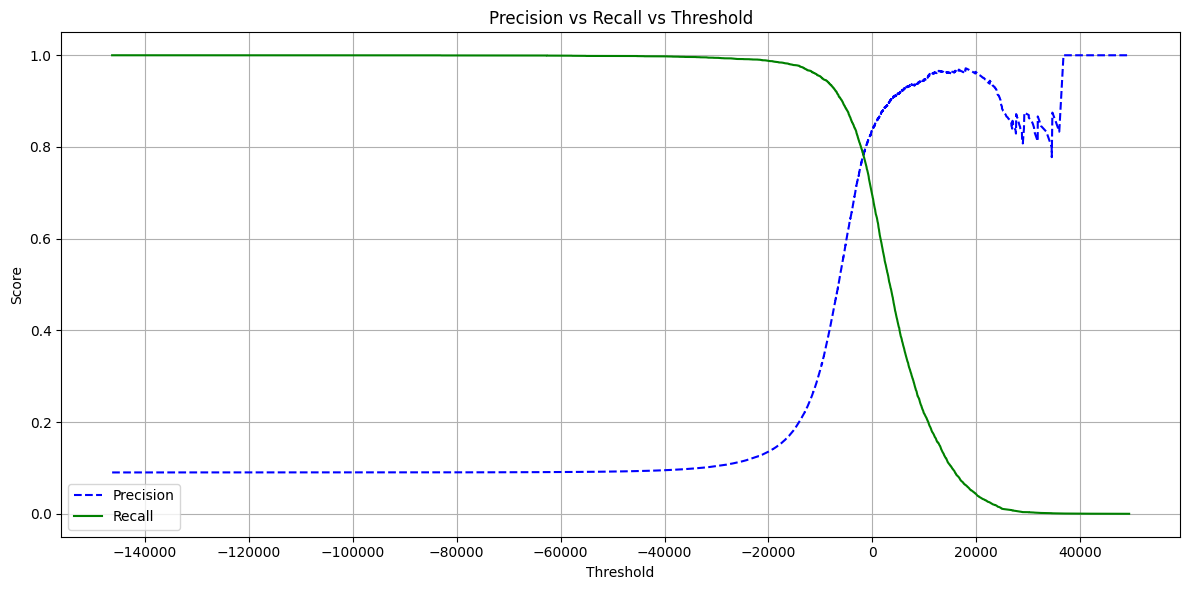

In [88]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Compute precision-recall data
precisions, recalls, thresholds = precision_recall_curve(y_train_mod, y_des_score)

def plt_prec_recall_threshold(precisions, recalls, thresholds):
    # Create figure first
    plt.figure(figsize=(12, 6))  # width=12, height=6 (120 is too large)
    
    # Plot curves
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
    # Add labels, legend, grid
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision vs Recall vs Threshold")
    plt.legend(loc="best")
    plt.grid(True)
    
    # Set tick spacing
    plt.gca().xaxis.set_major_locator(MultipleLocator(20000))  # multiples of 20,000
    
    plt.tight_layout()

# Call function
plt_prec_recall_threshold(precisions, recalls, thresholds)

# Show plot
plt.show()


In [90]:
#Now setting up threshold values for 90 percent
th_value=thresholds[np.argmax(precisions>=0.9)]
print(th_value)


3370.0194991439557


In [91]:
#getting instances with reqd threshold
y_mod_th=(y_des_score>=th_value)

In [92]:
#recalculating the precision
precision_score(y_train_mod,y_mod_th)

0.9001658374792704

In [93]:
#calculating the recall
recall_score(y_train_mod,y_mod_th)

0.5006456373362849

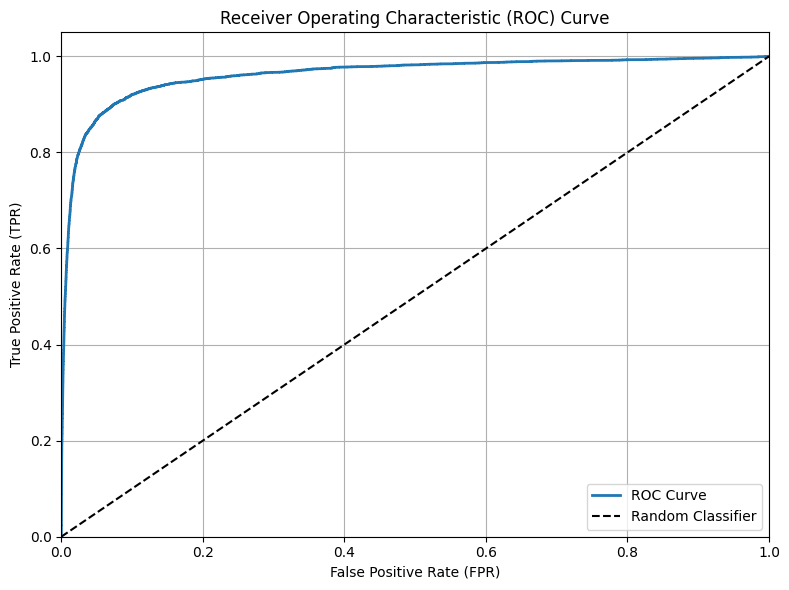

In [103]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC data
fpr, tpr, thresholds = roc_curve(y_train_mod, y_des_score)
fpr

def plt_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))  # ✅ Create figure first
    plt.plot(fpr, tpr, linewidth=2, label=label or "ROC Curve")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # ✅ Correct baseline
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.tight_layout()

# Plot ROC curve
plt_roc_curve(fpr, tpr)

# Show the plot
plt.show()


In [104]:
#computing area under the ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_mod,y_des_score)


0.9621938936257393